Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import cv2
import graphviz
from sklearn.tree import plot_tree
import pydot

In [ ]:
#!pip install -q kaggle

In [ ]:
# Download latest version
path = kagglehub.dataset_download("stealthtechnologies/employee-attrition-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))
attrition_df = pd.read_csv(os.path.join(path, 'test.csv'))
attrition_df.head()

100%|██████████| 1.72M/1.72M [00:00<00:00, 47.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/stealthtechnologies/employee-attrition-dataset/versions/2
['test.csv', 'train.csv']


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [ ]:
train_df = pd.read_csv(os.path.join(path, 'train.csv'))
train_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
df = pd.concat([train_df, attrition_df])
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
if 'Employee ID' in attrition_df.columns:
    attrition_df = attrition_df.drop('Employee ID', axis=1)

if 'Company Tenure' in attrition_df.columns:
    attrition_df = attrition_df.drop('Company Tenure', axis=1)

In [ ]:
print(attrition_df.shape)
print(attrition_df.columns)
print(attrition_df.dtypes)

(14900, 22)
Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')
Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level         

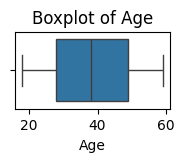

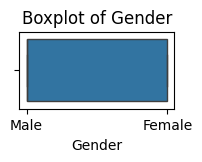

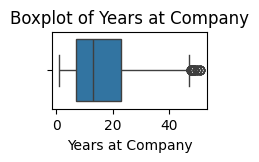

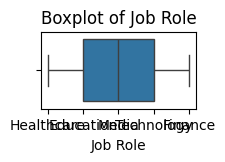

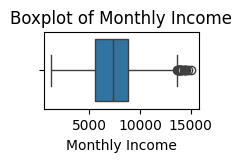

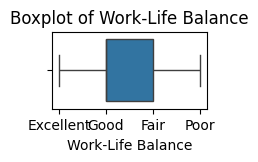

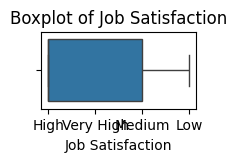

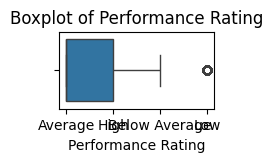

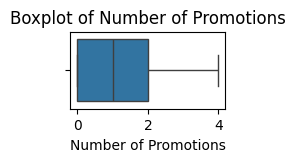

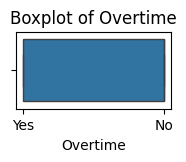

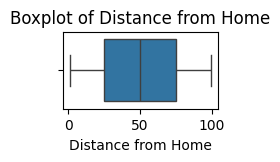

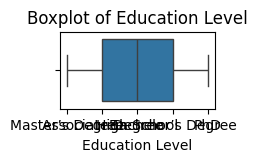

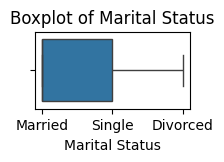

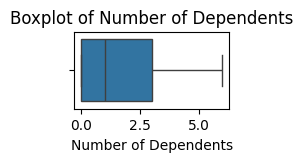

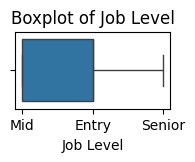

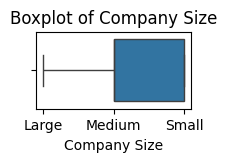

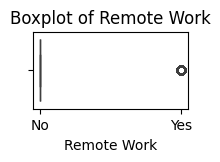

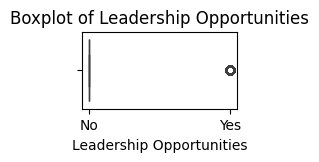

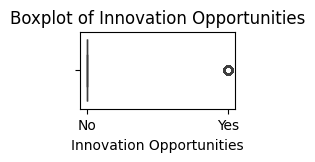

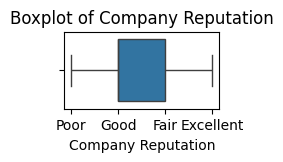

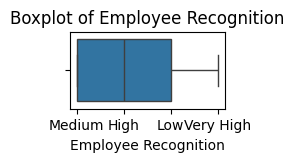

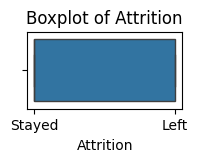

In [ ]:
def plot_boxplot(df, column):
  plt.figure(figsize=(2, 1))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

for col in attrition_df.columns:
  plot_boxplot(attrition_df, col)

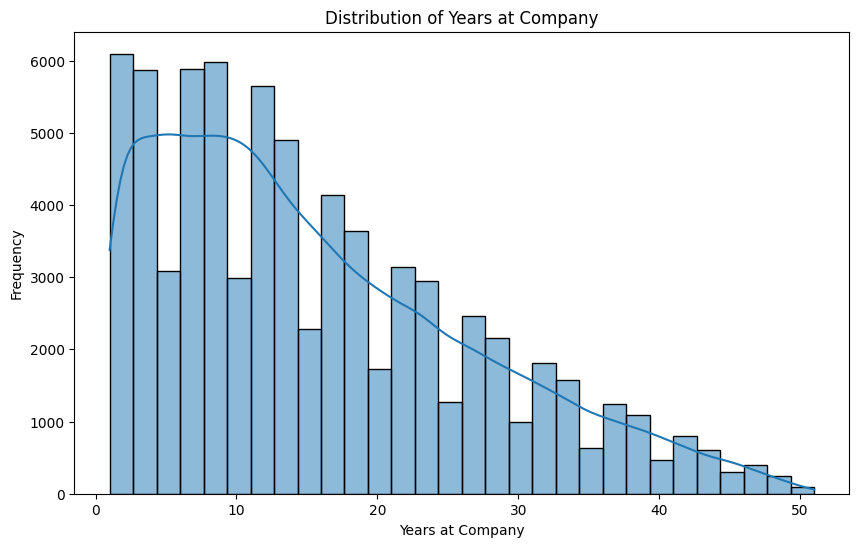

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Years at Company'], bins=30, kde=True)
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()


In [ ]:
attrition_df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329
std,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000
25%,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000
50%,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000
75%,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000
max,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000


51 years as the max Years at Company seems infeasible. The max Age is 59 and the max years at Company is 51. Say someone started working at one company at 16 years old and stayed there until retirement, that is 59 - 16 = 43 years at the company.

In [ ]:
# Remove outliers from Years at Company anything greater than 40
attrition_df = attrition_df[attrition_df['Years at Company'] <= 40]


In [ ]:
print("Clean data shape:", attrition_df.shape)
attrition_df.head()

Clean data shape: (14415, 22)


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,Married,1,Mid,Large,No,No,No,Poor,Medium,Stayed
1,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,Single,4,Entry,Medium,No,No,No,Good,High,Left
2,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,Divorced,2,Senior,Medium,No,No,Yes,Good,Low,Stayed
4,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,Married,6,Mid,Large,Yes,No,No,Good,High,Stayed
5,45,Female,30,Healthcare,8104,Fair,High,Average,0,No,...,Divorced,0,Senior,Large,No,No,No,Good,Low,Stayed


In [ ]:
ordinal_var = ['Job Satisfaction', 'Performance Rating', 'Work-Life Balance', 'Education Level', 'Job Level', 'Company Size', 'Company Reputation', 'Employee Recognition']

In [ ]:
# ordinal features and their respectiv
ordinal_features = [
    'Job Satisfaction',
    'Performance Rating',
    'Work-Life Balance',
    'Education Level',
    'Job Level',
    'Company Size',
    'Company Reputation',
    'Employee Recognition'
]

categories = [
    ['Low','Medium','High','Very High'], # Job Satisfaction
    ['Low','Below Average','Average','High'], # performance rating
    ['Poor','Fair','Good','Excellent'], #work-life balance
    ['High School','Associate Degree',"Bachelor’s Degree","Master’s Degree",'PhD'], # education level
    ['Entry','Mid','Senior'], # Job level
    ['Small','Medium','Large'], # company size
    ['Poor','Fair','Good','Excellent'], # company reputation
    ['Low','Medium','High','Very High'], # employee recognition
]

encoder = OrdinalEncoder(categories=categories, dtype=int)


encoded = encoder.fit_transform(attrition_df[ordinal_features])

encoded_df = pd.DataFrame(
    encoded,
    columns=[f"{c}_ord" for c in ordinal_features],
    index=attrition_df.index
)


attrition_df = pd.concat([attrition_df, encoded_df], axis=1)
attrition_df.drop(columns=ordinal_features, inplace=True)




In [ ]:
#label encoder for attriton column
le = LabelEncoder()
attrition_df['Attrition'] = le.fit_transform(attrition_df['Attrition'])
attrition_df.head()
#stayed is 1 left is 0

,Age,Gender,Years at Company,Job Role,Monthly Income,Number of Promotions,Overtime,Distance from Home,Marital Status,Number of Dependents,...,Innovation Opportunities,Attrition,Job Satisfaction_ord,Performance Rating_ord,Work-Life Balance_ord,Education Level_ord,Job Level_ord,Company Size_ord,Company Reputation_ord,Employee Recognition_ord
0,36,Male,13,Healthcare,8029,1,Yes,83,Married,1,...,No,1,2,2,3,3,1,2,0,1
1,35,Male,7,Education,4563,1,Yes,55,Single,4,...,No,0,2,2,2,1,0,1,2,2
2,50,Male,7,Education,5583,3,Yes,14,Divorced,2,...,Yes,1,2,2,1,1,2,1,2,0
4,39,Male,24,Education,4604,0,Yes,47,Married,6,...,No,1,2,2,2,3,1,2,2,2
5,45,Female,30,Healthcare,8104,0,No,38,Divorced,0,...,No,1,2,2,1,1,2,2,2,0


In [ ]:
# Map Yes to 1 and No to 0
yesno_var = ['Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
def convert_yes_no(df, column_name):
    df[column_name] = df[column_name].astype(str).map({'Yes': 1, 'No': 0})
    return df

for col in yesno_var:
    yesno_df = convert_yes_no(attrition_df, col)
yesno_df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Number of Promotions,Overtime,Distance from Home,Marital Status,Number of Dependents,...,Innovation Opportunities,Attrition,Job Satisfaction_ord,Performance Rating_ord,Work-Life Balance_ord,Education Level_ord,Job Level_ord,Company Size_ord,Company Reputation_ord,Employee Recognition_ord
0,36,Male,13,Healthcare,8029,1,1,83,Married,1,...,0,1,2,2,3,3,1,2,0,1
1,35,Male,7,Education,4563,1,1,55,Single,4,...,0,0,2,2,2,1,0,1,2,2
2,50,Male,7,Education,5583,3,1,14,Divorced,2,...,1,1,2,2,1,1,2,1,2,0
4,39,Male,24,Education,4604,0,1,47,Married,6,...,0,1,2,2,2,3,1,2,2,2
5,45,Female,30,Healthcare,8104,0,0,38,Divorced,0,...,0,1,2,2,1,1,2,2,2,0


In [ ]:
ohe_var = ['Gender', 'Job Role', 'Marital Status']

# Instantiate OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# fit and transforn
# create a temporary array
temp = enc.fit_transform(attrition_df[ohe_var]).toarray()

# create temp_df with encoded data
temp = pd.DataFrame(temp, columns=enc.get_feature_names_out())

# merge the two dataframes
attrition_df = attrition_df.merge(temp, left_index=True, right_index=True)

# drop original columns
attrition_df.drop(columns=ohe_var, inplace=True)
attrition_df.head()
# change gender columns to type int
#attrition_df = df.astype({'Gender_Female': 'int', 'Gender_Male': 'int'})

,Age,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Remote Work,Leadership Opportunities,Innovation Opportunities,...,Gender_Female,Gender_Male,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,36,13,8029,1,1,83,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,35,7,4563,1,1,55,4,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,50,7,5583,3,1,14,2,0,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,39,24,4604,0,1,47,6,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,45,30,8104,0,0,38,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
continuous_var = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents']

In [ ]:
# Scale Continuous Variables
scaler = MinMaxScaler()
attrition_df[continuous_var] = scaler.fit_transform(attrition_df[continuous_var])
attrition_df.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Remote Work,Leadership Opportunities,Innovation Opportunities,...,Gender_Female,Gender_Male,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0.439024,0.307692,0.504636,0.25,1,0.836735,0.166667,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.414634,0.153846,0.247534,0.25,1,0.551020,0.666667,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.780488,0.153846,0.323196,0.75,1,0.132653,0.333333,0,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.512195,0.589744,0.250575,0.00,1,0.469388,1.000000,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.658537,0.743590,0.510200,0.00,0,0.377551,0.000000,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Summary Statistics


---
### Logistic Regression

Accuracy: 71.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      1285
           1       0.75      0.72      0.73      1504

    accuracy                           0.72      2789
   macro avg       0.72      0.72      0.72      2789
weighted avg       0.72      0.72      0.72      2789



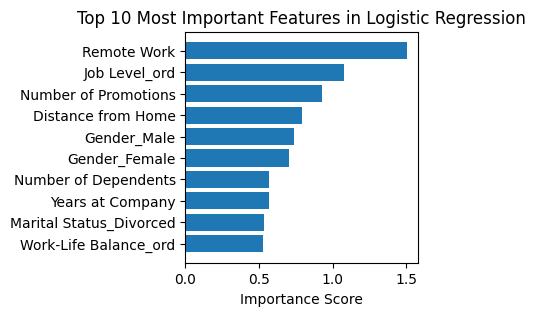

In [ ]:
# This will be used for the remainder of the notebook
X = attrition_df.drop('Attrition', axis=1)
y = attrition_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
#feature dependence
coefs = np.abs(model.coef_[0])
features = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': coefs})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(3, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features in Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

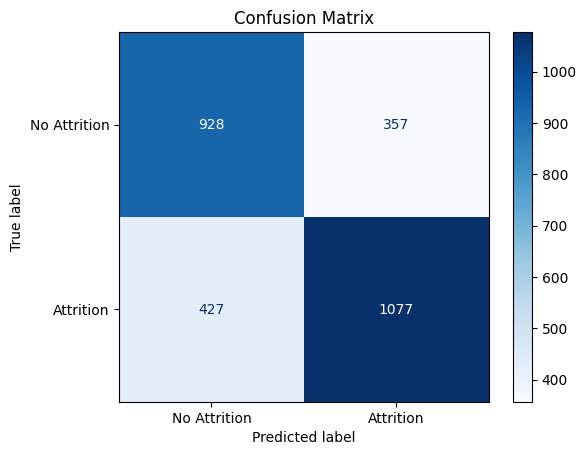

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

---
### Decision Tree

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
# Fit a DecisionTreeClassifier model
tree = DecisionTreeClassifier(random_state=42)

# print default parameters
print("Default parameters:\n")
pprint(tree.get_params())
print()

# fit the model
tree.fit(X_train, y_train)
tree.get_depth()

y_pred = tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%\n')
tree_classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", tree_classification_report)
print(f'Tree Depth: {tree.get_depth()}')

Default parameters:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Accuracy: 61.85%

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61      1285
           1       0.66      0.60      0.63      1504

    accuracy                           0.62      2789
   macro avg       0.62      0.62      0.62      2789
weighted avg       0.62      0.62      0.62      2789

Tree Depth: 30


In [ ]:
# capture cm to compare later
cm_before_tuning = confusion_matrix(y_test, y_pred)

##### Tuning hyperparmaters with GridSearchCV

In [ ]:
# Prepare the hyperparameters values to search
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
min_samples_leaf = np.arange(2, 15, 2)
min_samples_split = [2, 3, 5, 7, 10]

combinations = len(max_depth) * len(min_samples_leaf) * len(min_samples_split)
print(f"Grid Search will try {combinations} hyperparameter combinations")

# Create the hyperparameter grid
# Grid set up will used with multiple models below
grid = {'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'class_weight': ['balanced']
       }

# Instantiate the grid search model
#  Note: cv=5 for faster computation
gs = GridSearchCV(tree, param_grid=grid,
                  scoring="accuracy", verbose=1,
                  n_jobs=-1, cv=5, return_train_score=True)

Grid Search will try 350 hyperparameter combinations


In [ ]:
%%time
# Fit gridsearch
gs.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits
CPU times: user 2.67 s, sys: 481 ms, total: 3.15 s
Wall time: 1min 23s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'min_samples_split': [2, 3, 5, 7, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# Review best parameters and accuracy score from grid search
print("Optimal hyperparameter combination:", gs.best_params_)
print("\nMean cross-validated training accuracy score:", np.round(gs.best_score_,4))

Optimal hyperparameter combination: {'class_weight': 'balanced', 'max_depth': 6, 'min_samples_leaf': np.int64(4), 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.6933


In [ ]:
# Train with gs.best_params_ from cell above
gs.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=np.int64(4), random_state=42)

In [ ]:
# Review best grid search estimator's predictions on the test data
y_pred = gs.best_estimator_.predict(X_test)
grid_search_test_accuracy = np.round(accuracy_score(y_test, y_pred), 4)
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 3) *100,'%')

Test accuracy: 70.6 %


In [ ]:
# New confusion matrix
cm_after_tuning_tree = confusion_matrix(y_test, y_pred)

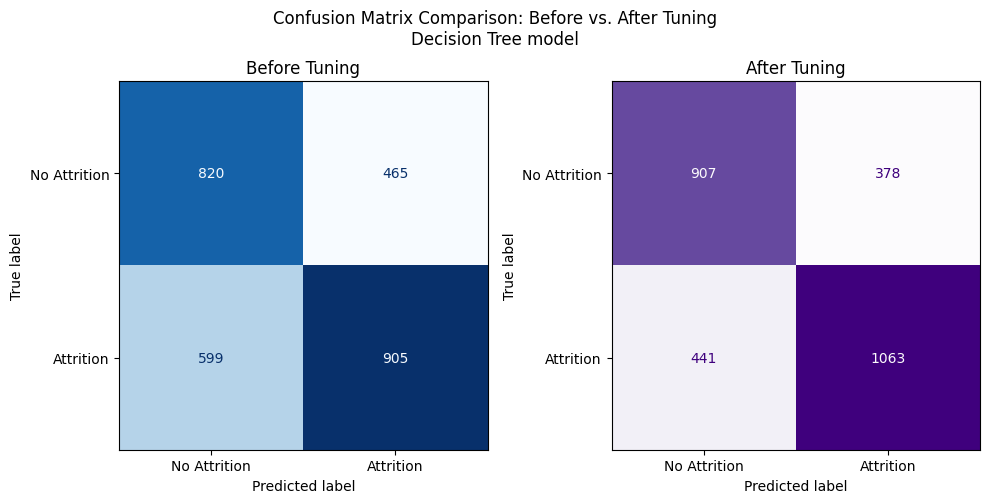

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Create two subplots side by side and unpack the output
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the original model (before tuning)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before_tuning, display_labels=['No Attrition', 'Attrition'])
disp_before.plot(ax=ax1, cmap='Blues', colorbar=False)  # Plot on the first subplot

# Plot the confusion matrix for the new model (after tuning)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after_tuning_tree, display_labels=['No Attrition', 'Attrition'])
disp_after.plot(ax=ax2,cmap='Purples', colorbar=False)  # Plot on the second subplot

# Add titles to the subplots
ax1.set_title('Before Tuning')
ax2.set_title('After Tuning')

# Add a title for the entire figure
f.suptitle('Confusion Matrix Comparison: Before vs. After Tuning\nDecision Tree model', fontsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
gs.best_estimator_.feature_importances_

array([1.62680123e-02, 1.14029132e-02, 7.89240174e-03, 8.06477975e-02,
       0.00000000e+00, 2.34827220e-02, 2.02601621e-03, 2.18089193e-01,
       0.00000000e+00, 0.00000000e+00, 6.71316912e-03, 3.35518728e-03,
       1.66027488e-01, 2.09910977e-02, 4.15072093e-01, 2.37995632e-17,
       2.57087832e-02, 3.81792946e-04, 1.79332003e-04, 0.00000000e+00,
       0.00000000e+00, 1.76200038e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

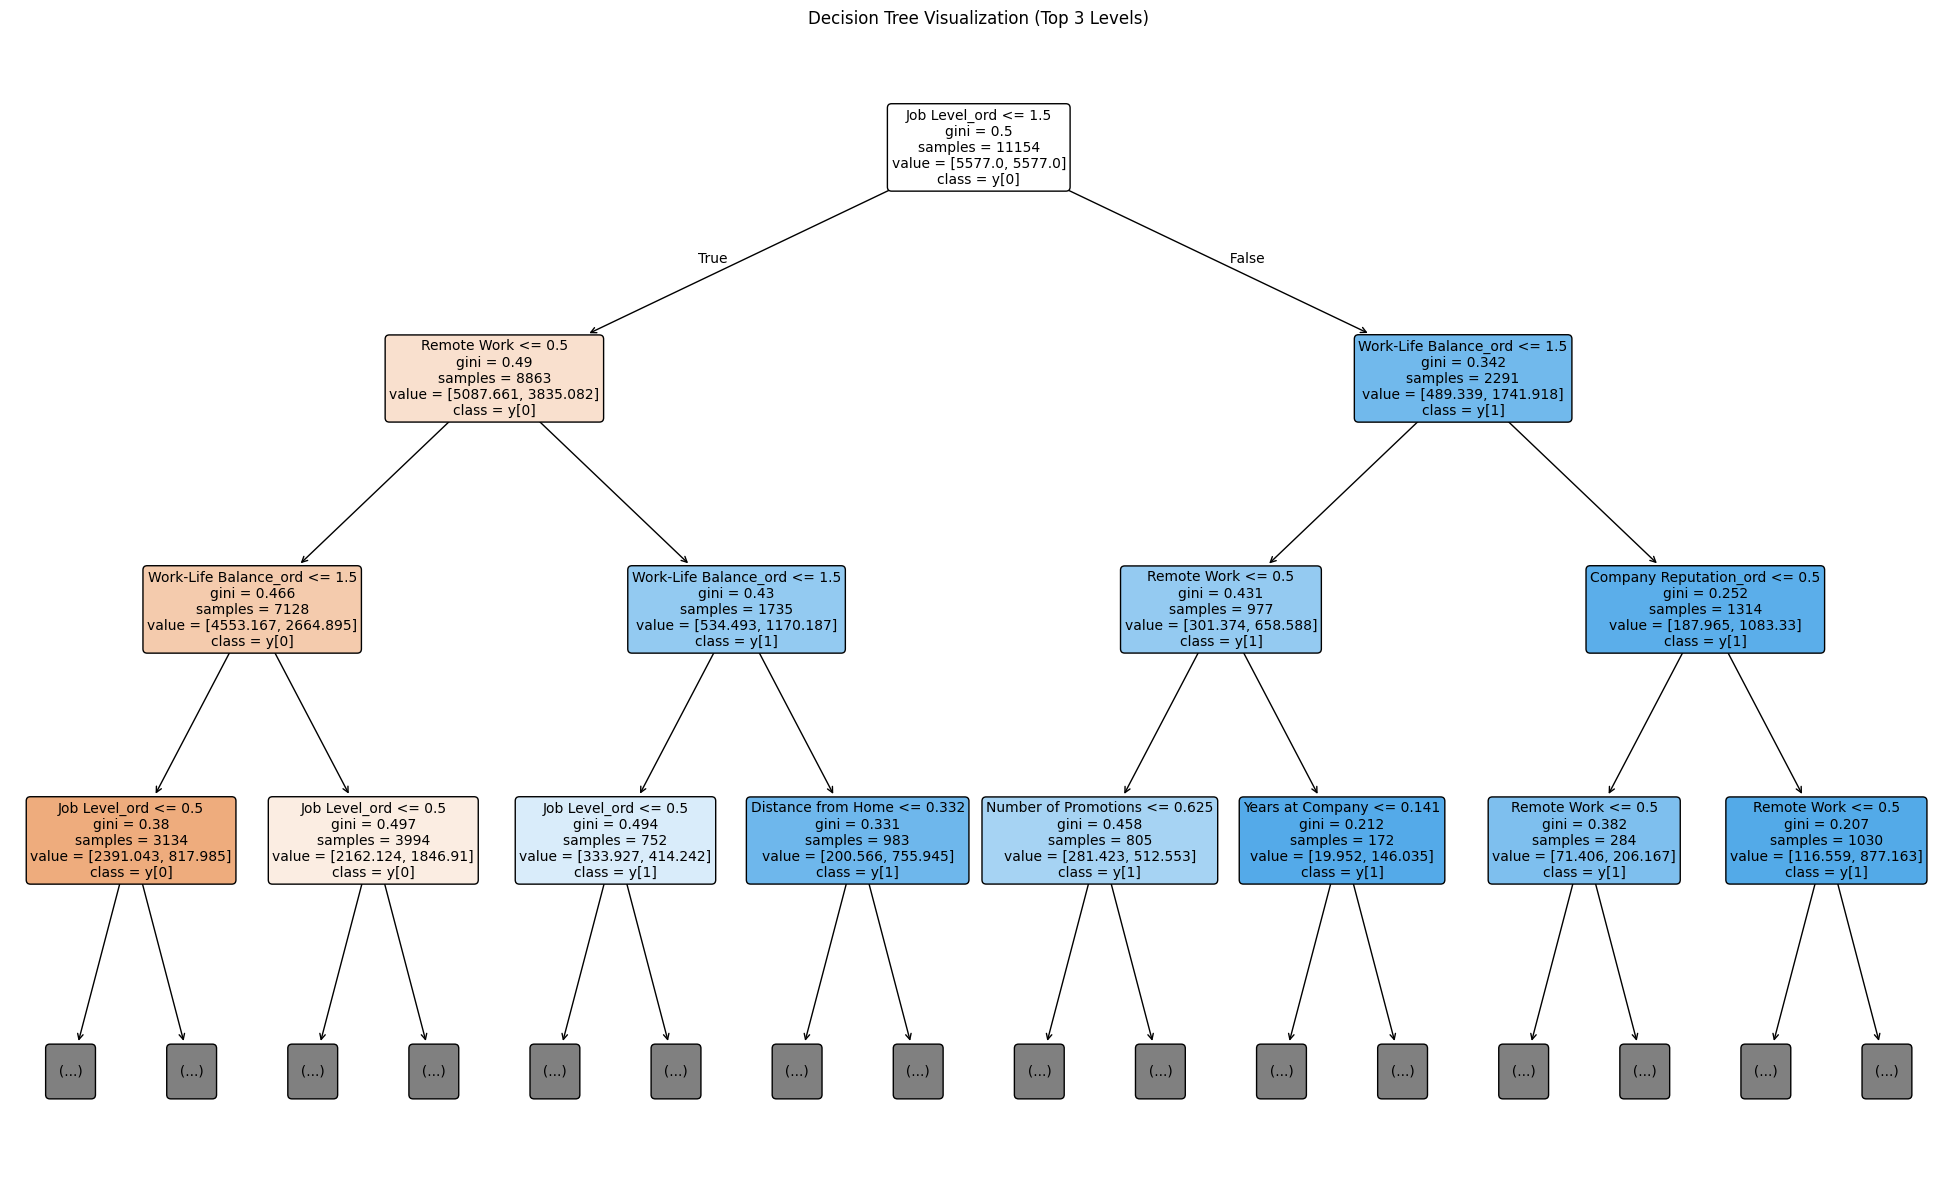

In [ ]:
best_tree = gs.best_estimator_

# Plot the decision tree
plt.figure(figsize=(25,15))
plot_tree(best_tree, filled=True, feature_names=X_test.columns, class_names=True, rounded=True, max_depth=3, fontsize=10)  # limit depth for readability
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()

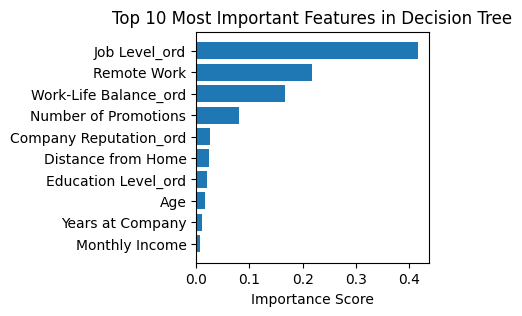

In [ ]:
importances = best_tree.feature_importances_
features = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(3, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features in Decision Tree')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

---
### Random Forest

Random Forest Metrics Before Tuning

Accuracy: 70.78%

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.69      1285
           1       0.75      0.70      0.72      1504

    accuracy                           0.71      2789
   macro avg       0.71      0.71      0.71      2789
weighted avg       0.71      0.71      0.71      2789



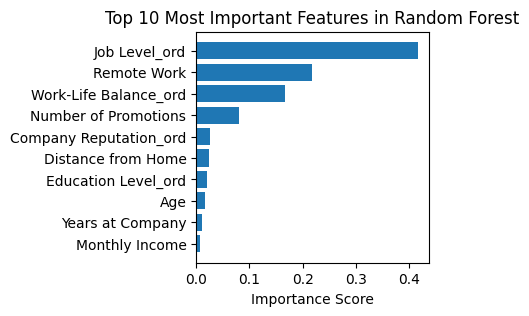

In [ ]:
# Instantiate the Random Forest model with a fixed random state for reproducy
forest = RandomForestClassifier(random_state=42)

# Fit the model on the training data
forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = forest.predict(X_test)

# capture confusion natrix
cm_before_tuning_forest = confusion_matrix(y_test, y_pred)

# Print the accuracy score (percentage of correct predictions)
print('Random Forest Metrics Before Tuning\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n')

# Generate a detailed classification report
forest_classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", forest_classification_report)

# feature importance
importances = gs.best_estimator_.feature_importances_
feature_list = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': feature_list, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(3, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features in Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [ ]:
# Instantiate the grid search model
#  Note: cv=7 for faster computation lower it
gs = GridSearchCV(forest, param_grid=grid,
                  scoring="accuracy", verbose=1,
                  n_jobs=-1, cv=5, return_train_score=True)

In [ ]:
%%time
# Fit gridsearch
gs.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits
CPU times: user 13.5 s, sys: 2.92 s, total: 16.5 s
Wall time: 20min 2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'min_samples_split': [2, 3, 5, 7, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# Review best parameters and accuracy score from grid search
print("Optimal hyperparameter combination:", gs.best_params_)
print("\nMean cross-validated training accuracy score:", np.round(gs.best_score_,4))

Optimal hyperparameter combination: {'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': np.int64(10), 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.7134


In [ ]:
# Train with gs.best_params_ from cell above
gs.best_estimator_.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       min_samples_leaf=np.int64(10), random_state=42)

In [ ]:
# make prediction using optimized model
y_pred = gs.best_estimator_.predict(X_test)

In [ ]:
# New confusion matrix
cm_after_tuning_forest = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the accuracy score (percentage of correct predictions)
print('Random Forest Metrics After Tuning\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n')

Random Forest Metrics After Tuning

Accuracy: 71.24%



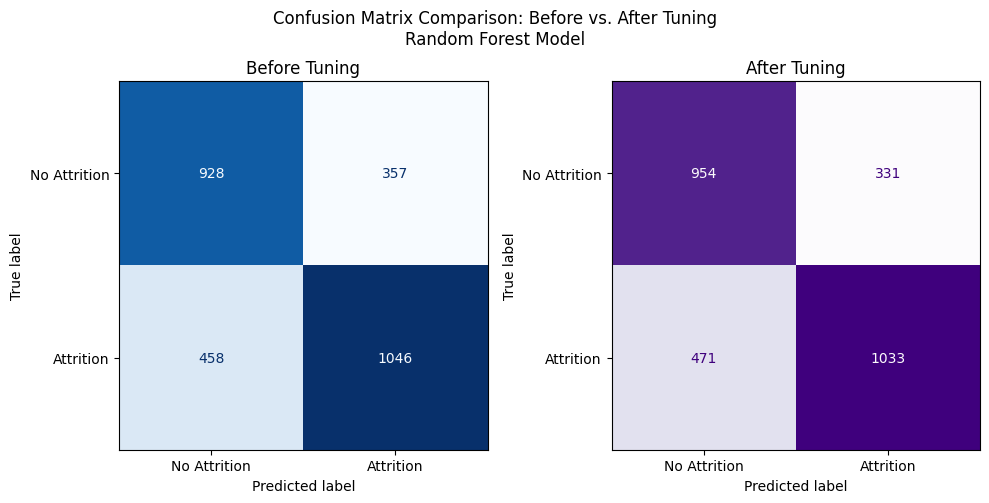

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Create two subplots side by side and unpack the output
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the original model (before tuning)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before_tuning_forest, display_labels=['No Attrition', 'Attrition'])
disp_before.plot(ax=ax1, cmap='Blues', colorbar=False)  # Plot on the first subplot

# Plot the confusion matrix for the new model (after tuning)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after_tuning_forest, display_labels=['No Attrition', 'Attrition'])
disp_after.plot(ax=ax2,cmap='Purples', colorbar=False)  # Plot on the second subplot

# Add titles to the subplots
ax1.set_title('Before Tuning')
ax2.set_title('After Tuning')

# Add a title for the entire figure
f.suptitle('Confusion Matrix Comparison: Before vs. After Tuning\nRandom Forest Model', fontsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# feature importance
importances = gs.best_estimator_.feature_importances_
feature_list = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': feature_list, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

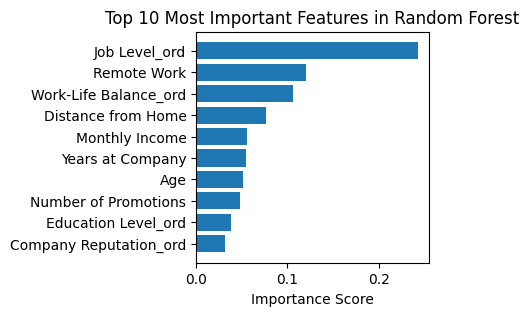

In [ ]:

# Plot
plt.figure(figsize=(3, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features in Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [ ]:
# Extract a small tree
tree_small = gs.best_estimator_.estimators_[7]

In [ ]:
best_rf_model = gs.best_estimator_

*Support* Vector Machine

Default parameters for SVC:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

SVC Metrics Before Tuning

Accuracy: 71.82%

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      1285
           1       0.75      0.71      0.73      1504

    accuracy                           0.72      2789
   macro avg       0.72      0.72      0.72      2789
weighted avg       0.72      0.72      0.72      2789



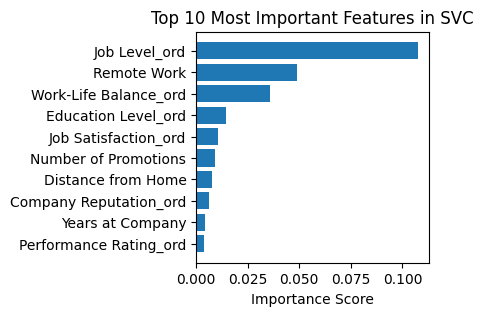

In [ ]:
# Instantiate the SVC model
SVC= SVC()

# Print Default parameters
print("Default parameters for SVC:\n")
pprint(SVC.get_params())
print()

# Fit training data to model
SVC.fit(X_train, y_train)

# Make predictions
y_pred = SVC.predict(X_test)

# Capture confusion matrix
cm_before_tuning_SVC = confusion_matrix(y_test, y_pred)

# Print the accuracy score (percentage of correct predictions)
print('SVC Metrics Before Tuning\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

# Print detailed classification report
SVC_classification_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", SVC_classification_report)
# Feature dependence
result = permutation_importance(
    SVC,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})
feat_imp = feat_imp.sort_values('importance_mean', ascending=False).head(10)
plt.figure(figsize=(3, 3))
plt.barh(feat_imp['feature'], feat_imp['importance_mean'])
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features in SVC')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()





In [ ]:
# Create Grid Search for SVC
grid = {'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
       }

# Instantiate the grid
# CV = 5 reduce computation time
gs = GridSearchCV(SVC, param_grid=grid,
                  scoring="accuracy", verbose=1,
                  n_jobs=-1, cv=5, return_train_score=True)

In [ ]:
%%time
# Fit gridsearch
gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 7.86 s, sys: 437 ms, total: 8.3 s
Wall time: 4min 23s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'class_weight': ['balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# Review best parameters and accuracy score from grid search
print("Optimal hyperparameter combination:", gs.best_params_)
print("\nMean cross-validated training accuracy score:", np.round(gs.best_score_,4))

Optimal hyperparameter combination: {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}

Mean cross-validated training accuracy score: 0.707


In [ ]:
# Train with gs.best_params_ from cell above
gs.best_estimator_.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma='auto')

In [ ]:
# make prediction using optimized model
y_pred = gs.best_estimator_.predict(X_test)

In [ ]:
# New confusion matrix
cm_after_tuning_SVC = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the accuracy score (percentage of correct predictions)
print('SVC Metrics After Tuning\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n')

SVC Metrics After Tuning

Accuracy: 71.32%



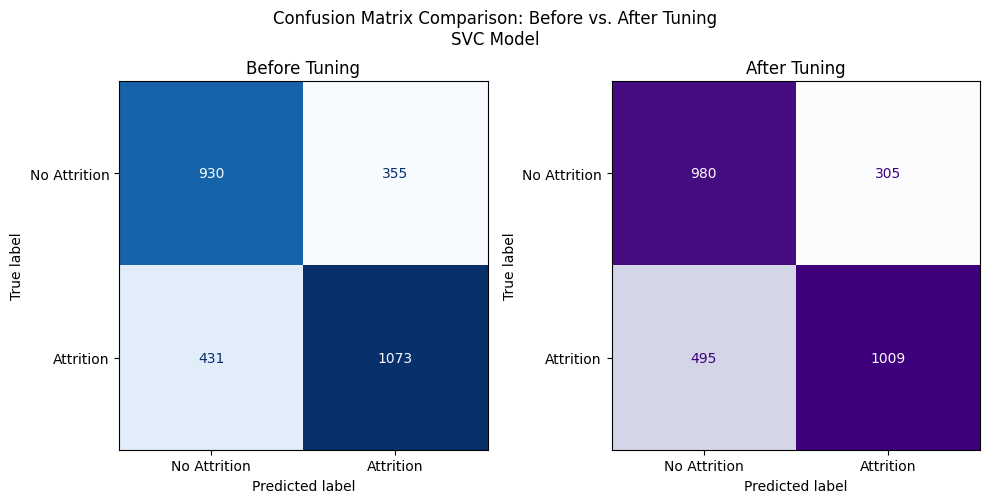

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Create two subplots side by side and unpack the output
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the original model (before tuning)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before_tuning_SVC, display_labels=['No Attrition', 'Attrition'])
disp_before.plot(ax=ax1, cmap='Blues', colorbar=False)  # Plot on the first subplot

# Plot the confusion matrix for the new model (after tuning)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after_tuning_SVC, display_labels=['No Attrition', 'Attrition'])
disp_after.plot(ax=ax2,cmap='Purples', colorbar=False)  # Plot on the second subplot

# Add titles to the subplots
ax1.set_title('Before Tuning')
ax2.set_title('After Tuning')

# Add a title for the entire figure
f.suptitle('Confusion Matrix Comparison: Before vs. After Tuning\nSVC Model', fontsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
best_svc_model = gs.best_estimator_

### Display all confusion matrix

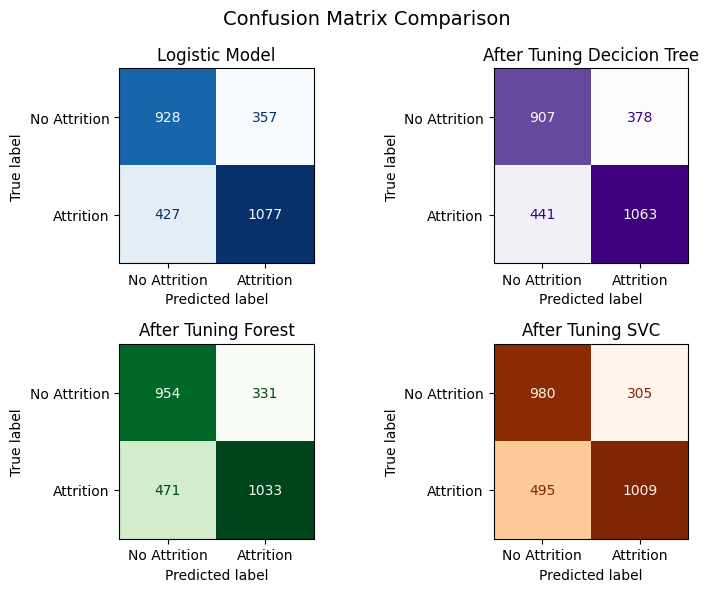

In [ ]:
# List of confusion matrices to be plotted
all_cm = [cm, cm_after_tuning_tree, cm_after_tuning_forest, cm_after_tuning_SVC]

# Create a 2x2 grid of subplots
f, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot each confusion matrix on its respective subplot
axs[0, 0].set_title('Logistic Model')
ConfusionMatrixDisplay(confusion_matrix=all_cm[0], display_labels=['No Attrition', 'Attrition']).plot(ax=axs[0, 0], cmap='Blues', colorbar=False)

axs[0, 1].set_title('After Tuning Decicion Tree')
ConfusionMatrixDisplay(confusion_matrix=all_cm[1], display_labels=['No Attrition', 'Attrition']).plot(ax=axs[0, 1], cmap='Purples', colorbar=False)

axs[1, 0].set_title('After Tuning Forest')
ConfusionMatrixDisplay(confusion_matrix=all_cm[2], display_labels=['No Attrition', 'Attrition']).plot(ax=axs[1, 0], cmap='Greens', colorbar=False)

axs[1, 1].set_title('After Tuning SVC')
ConfusionMatrixDisplay(confusion_matrix=all_cm[3], display_labels=['No Attrition', 'Attrition']).plot(ax=axs[1, 1], cmap='Oranges', colorbar=False)

# Add a title for the entire figure
f.suptitle('Confusion Matrix Comparison', fontsize=14)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("confusion_matrices_comparison.png")

plt.show()


<ipython-input-58-dd5386bbf676>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


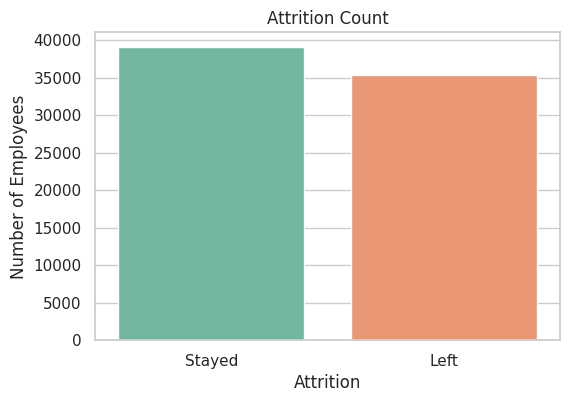

In [ ]:
# Set style
sns.set(style="whitegrid")

# Attrition count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

<ipython-input-59-a192c45b109f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Monthly Income', palette='coolwarm')


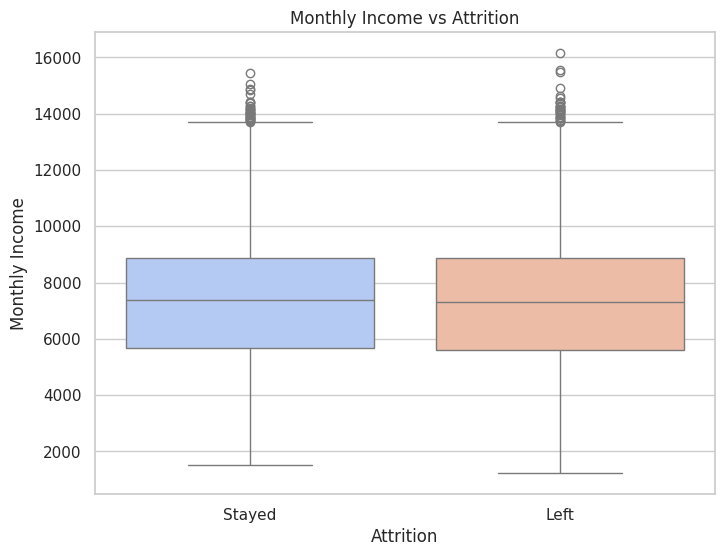

In [ ]:
# Monthly Income by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='Monthly Income', palette='coolwarm')
plt.title('Monthly Income vs Attrition')
plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.show()

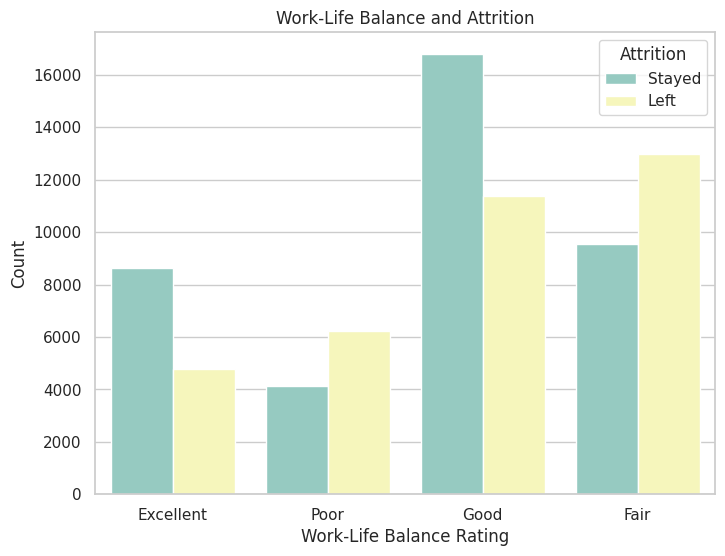

In [ ]:
# Work-Life Balance vs Attrition
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Work-Life Balance', hue='Attrition', palette='Set3')
plt.title('Work-Life Balance and Attrition')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

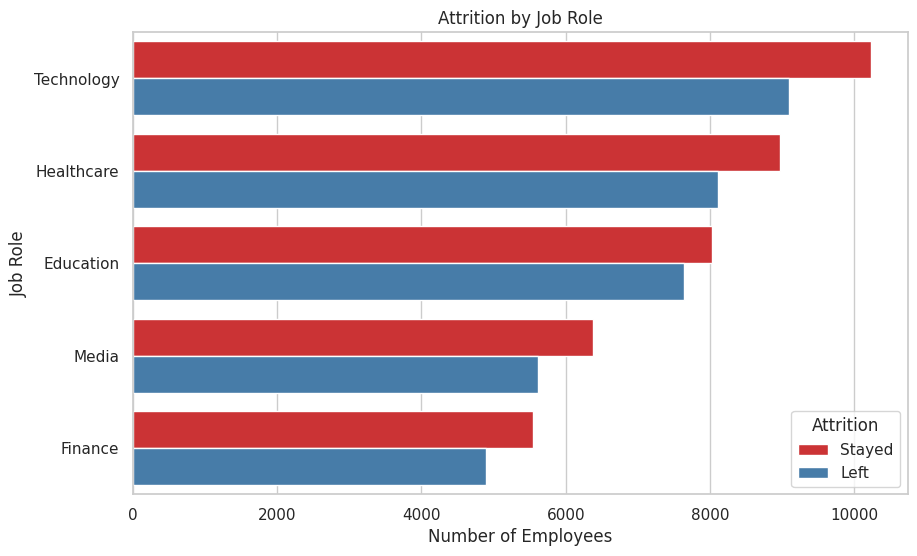

In [ ]:
# Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Job Role', hue='Attrition', palette='Set1', order=df['Job Role'].value_counts().index)
plt.title('Attrition by Job Role')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.show()

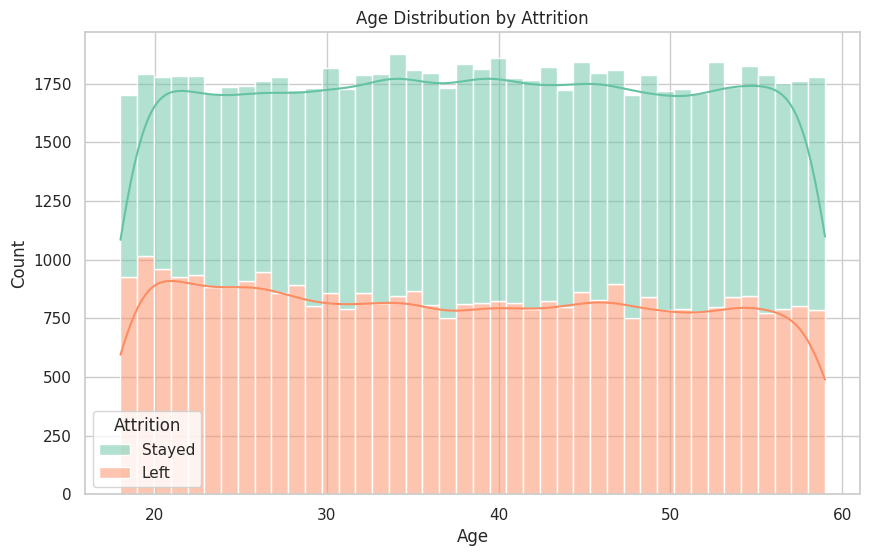

In [ ]:
# Age distribution by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, multiple='stack', palette='Set2')
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# feature dependence logistic regression



In [ ]:
# Select an example row (first row in X_test)
example_index = 0
example = X_test.iloc[[example_index]]
example_label = y_test.iloc[example_index]

print(f"Actual Label: {y_test.iloc[example_index]}")

# Print all feature values for the selected employee
print("Example employee's features:\n")
for feature, value in example.iloc[0].items():
    print(f"{feature:30}: {value:.3f}")

# Predict
logistic_pred = model.predict(example)[0]
tree_pred = best_tree.predict(example)[0]
forest_pred = best_rf_model.predict(example)[0]
svc_pred = best_svc_model.predict(example)[0]

# Print model predictions
print(f"\nLogistic Regression Prediction: {'Stayed' if logistic_pred == 1 else 'Left'}")
print(f"Decision Tree Prediction       : {'Stayed' if tree_pred == 1 else 'Left'}")
print(f"Random Forest Prediction       : {'Stayed' if forest_pred == 1 else 'Left'}")
print(f"SVC Prediction                 : {'Stayed' if svc_pred == 1 else 'Left'}")

# Print actual label
print(f"\nActual Label                  : {'Stayed' if example_label == 1 else 'Left'}")


Actual Label: 0
Example employee's features:

Age                           : 0.902
Years at Company              : 0.513
Monthly Income                : 0.655
Number of Promotions          : 0.000
Overtime                      : 1.000
Distance from Home            : 0.724
Number of Dependents          : 0.333
Remote Work                   : 0.000
Leadership Opportunities      : 0.000
Innovation Opportunities      : 0.000
Job Satisfaction_ord          : 3.000
Performance Rating_ord        : 2.000
Work-Life Balance_ord         : 1.000
Education Level_ord           : 0.000
Job Level_ord                 : 0.000
Company Size_ord              : 1.000
Company Reputation_ord        : 3.000
Employee Recognition_ord      : 0.000
Gender_Female                 : 1.000
Gender_Male                   : 0.000
Job Role_Education            : 0.000
Job Role_Finance              : 0.000
Job Role_Healthcare           : 1.000
Job Role_Media                : 0.000
Job Role_Technology           : 0.000
Mari

In [ ]:
# Get coefficients
coefs = model.coef_[0]
features = X_test.columns
example_values = example.values[0]

# Print per-feature contribution
print("\nLogistic Regression Contributions:\n")
for feat, val, coef in zip(features, example_values, coefs):
    contribution = val * coef
    print(f"{feat:30} | value: {val:.3f} | coef: {coef:.3f} | contrib: {contribution:.3f}")

# Calculate final logit and probability
logit = np.dot(example_values, coefs) + model.intercept_[0]
prob = 1 / (1 + np.exp(-logit))
print(f"\nLogit (linear output): {logit:.3f}")
print(f"Predicted Probability: {prob:.3f}")



Logistic Regression Contributions:

Age                            | value: 0.902 | coef: 0.238 | contrib: 0.215
Years at Company               | value: 0.513 | coef: 0.565 | contrib: 0.290
Monthly Income                 | value: 0.655 | coef: 0.107 | contrib: 0.070
Number of Promotions           | value: 0.000 | coef: 0.929 | contrib: 0.000
Overtime                       | value: 1.000 | coef: -0.322 | contrib: -0.322
Distance from Home             | value: 0.724 | coef: -0.793 | contrib: -0.575
Number of Dependents           | value: 0.333 | coef: 0.568 | contrib: 0.189
Remote Work                    | value: 0.000 | coef: 1.506 | contrib: 0.000
Leadership Opportunities       | value: 0.000 | coef: 0.287 | contrib: 0.000
Innovation Opportunities       | value: 0.000 | coef: 0.076 | contrib: 0.000
Job Satisfaction_ord           | value: 3.000 | coef: -0.021 | contrib: -0.063
Performance Rating_ord         | value: 2.000 | coef: 0.142 | contrib: 0.284
Work-Life Balance_ord          | 

In [ ]:
from sklearn.tree import _tree

def explain_tree_path(tree_model, feature_names, instance):
    node_indicator = tree_model.decision_path(instance)
    feature = tree_model.tree_.feature
    threshold = tree_model.tree_.threshold

    print("\nDecision Tree Path Explanation:\n")
    for node_id in node_indicator.indices:
        if feature[node_id] != _tree.TREE_UNDEFINED:
            feat_name = feature_names[feature[node_id]]
            threshold_val = threshold[node_id]
            instance_val = instance[0, feature[node_id]]
            decision = "<=" if instance_val <= threshold_val else ">"
            print(f"{feat_name:30} = {instance_val:.3f} {decision} {threshold_val:.3f}")
explain_tree_path(best_tree, X_test.columns, example.values)


Decision Tree Path Explanation:

Job Level_ord                  = 0.000 <= 1.500
Remote Work                    = 0.000 <= 0.500
Work-Life Balance_ord          = 1.000 <= 1.500
Job Level_ord                  = 0.000 <= 0.500
Number of Promotions           = 0.000 <= 0.625
Education Level_ord            = 0.000 <= 3.500


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
